In [1]:
from NBodyHandler import *
import matplotlib.pyplot as plt
import matplotlib.animation

%matplotlib ipympl

In [2]:
mass_array = [1, 1, 1, 1]
pos_array = [
    [1,1],
    [-1,-1],
    [2,-2],
    [-1, 2]
]
vel_array = [
    [1,-1],
    [-1,1],
    [1,-1],
    [2, 1]
]
vel_array = 0.1*np.array(vel_array)
nbody = NBodyHandler(mass_array, pos_array, vel_array, epsilon=0.01)

t_eval = np.arange(0,30,0.0001)
t, vec  = nbody.solve(t_eval, "RK45")

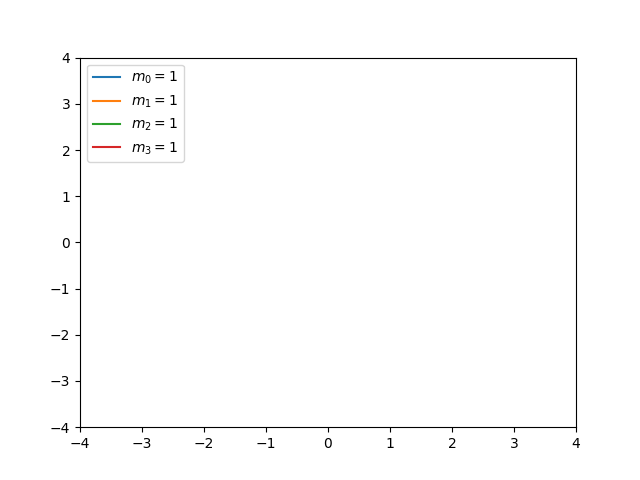

In [3]:
fig, ax = plt.subplots()

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

points_arr = []
for idx in range(0, len(mass_array)):
    point = ax.plot(vec[2*idx,0], vec[2*idx+1,0],'-', label=rf"$m_{idx} = {mass_array[idx]}$")[0]
    points_arr.append(point)

ax.legend(loc="upper left")

#make the animation
def update(frame):
    for idx in range(0, len(mass_array)):
        points_arr[idx].set_xdata(vec[2*idx, :frame])
        points_arr[idx].set_ydata(vec[2*idx+1, :frame])
    
    return points_arr

ani = matplotlib.animation.FuncAnimation(fig=fig, func=update, frames=len(t_eval), interval=1, repeat=True)
plt.show()

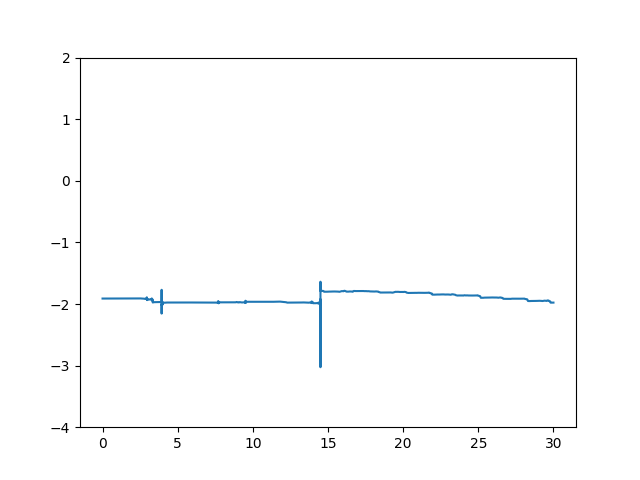

In [4]:
ham = nbody.ham

fig, ax = plt.subplots()

ax.set_ylim(-4,2)
ax.plot(t_eval, ham)

: 